# Mastering masking


In [11]:
(ns tasteless-lagoon
  (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

nil

## read the original picture

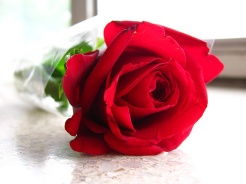

In [12]:
(def rose
  (-> "resources/chapter02/red_rose.jpg"
      (imread IMREAD_REDUCED_COLOR_2)))
(u/>>> rose)

## convert the color space to HSV

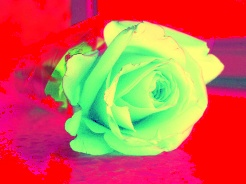

In [13]:
(def hsv
  (-> rose clone (cvt-color! COLOR_RGB2HSV)))

(u/>>> hsv)

## filter on red and create a mask from that filtering

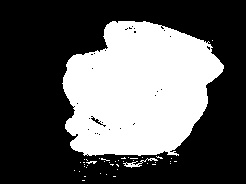

In [14]:
(def lower-red  (new-scalar 120 30 15))
(def upper-red (new-scalar 130 255 255))
(def mask (new-mat))
(in-range hsv lower-red upper-red mask)

(u/>>> mask)

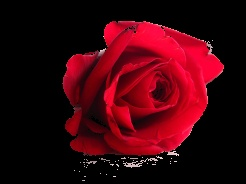

In [15]:
(def res (new-mat))
(bitwise-and! rose res mask)
(u/>>> res)

## adjust luminosity of the pixels selected by the mask

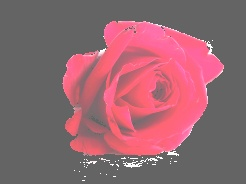

In [16]:
; change the color by using convert-to and
; apply  original*alpha  + beta on each pixel
(def res2 (new-mat))
(convert-to res res2 -1 1 100)

(u/>>> res2)

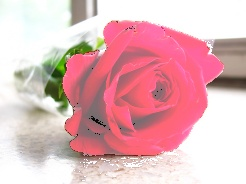

In [17]:
; copy the updated picture (which is the masked portion)
; to the original (a clone of)
(def cl (clone rose))
(copy-to res2 cl mask)

(u/>>> cl)

## copy something completely different using the mask

In [18]:
(def cl2 
  (imread "resources/chapter02/emilie1.jpg"))
(def cl3 
  (clone rose))

(resize! cl2 (new-size (cols mask) (rows mask)))
(u/>>> cl2)

(copy-to cl2 cl3 mask)

(u/>>> cl3)

CvException cv::Exception: OpenCV(4.3.0) /home/vagrant/origami-land/opencv-native/opencv/modules/core/src/copy.cpp:376: error: (-215:Assertion failed) size() == mask.size() in function 'copyTo'
  org.opencv.core.Mat.n_copyTo (Mat.java:-2)


class org.opencv.core.CvException: 